In [1]:
# Jack Import Incremental COVID Cases per 100,000
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

inc_cases_per_100000 = "Data/New_cases_per_100000.csv"

inc_cases_per_100000_df = pd.read_csv(inc_cases_per_100000, encoding="ISO-8859-1") 

inc_cases_per_100000_df.head()

,ï»¿Month,Alaska,Arkansas,Colorado,Connecticut,Delaware,Florida,Illinois,Kansas,Kentucky,Louisiana,Massachusetts,Missouri,North Dakota,Tennessee,Texas,Utah,Virginia,Wisconsin
0,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-01,3.6,4.2,10.4,13.2,6.3,5.1,8.4,2.5,2.4,20.3,16.1,3.4,3.3,6.1,2.0,5.5,2.9,4.9
2,2020-04-01,34.1,54.5,141.9,423.2,229.6,96.4,202.7,60.2,53.1,428.3,457.1,75.1,61.5,86.1,52.6,81.5,89.3,63.1
3,2020-05-01,16.2,101.9,217.7,580.7,533.9,107.1,506.1,199.4,110.9,287.6,735.5,95.1,179.7,163.7,104.5,138.4,266.2,144.7
4,2020-06-01,38.9,283.6,143.3,243.7,306.6,191.8,338.6,138.7,120.6,291.3,321.9,99.5,162.9,213.6,185.5,262.3,290.5,217.8


In [2]:
#Jack Clean Columns
list(inc_cases_per_100000_df.columns.values)
inc_cases_per_100000_df = inc_cases_per_100000_df.rename(columns={"ï»¿Month": "Month"})
inc_cases_per_100000_df.sample(10)

,Month,Alaska,Arkansas,Colorado,Connecticut,Delaware,Florida,Illinois,Kansas,Kentucky,Louisiana,Massachusetts,Missouri,North Dakota,Tennessee,Texas,Utah,Virginia,Wisconsin
9,2020-11-01,1654.0,1218.7,1429.1,828.5,696.0,654.5,1832.3,1705.6,1219.4,642.2,639.4,1450.9,4279.1,1272.0,1042.3,1962.0,507.4,2637.6
6,2020-08-01,331.5,707.1,237.3,92.1,304.4,1150.7,377.8,460.0,390.3,1063.2,151.9,567.8,535.9,872.8,814.2,460.6,364.7,448.1
0,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-07-01,152.4,595.3,166.5,81.5,292.8,1044.6,209.5,323.9,202.9,841.4,106.9,255.7,234.4,596.7,670.0,523.6,241.7,320.0
11,2021-01-01,850.6,1326.1,818.6,996.1,1204.1,888.8,887.0,1254.1,1010.5,928.9,1121.4,796.5,653.5,1777.8,918.5,1340.6,808.5,860.3
4,2020-06-01,38.9,283.6,143.3,243.7,306.6,191.8,338.6,138.7,120.6,291.3,321.9,99.5,162.9,213.6,185.5,262.3,290.5,217.8
7,2020-09-01,309.6,653.8,180.6,109.4,291.4,489.1,471.2,558.3,432.9,493.9,152.3,634.7,1037.4,643.4,509.5,447.3,344.7,535.6
1,2020-03-01,3.6,4.2,10.4,13.2,6.3,5.1,8.4,2.5,2.4,20.3,16.1,3.4,3.3,6.1,2.0,5.5,2.9,4.9
8,2020-10-01,605.3,833.5,379.5,230.6,381.7,367.8,607.2,688.1,619.2,394.0,240.0,768.7,1983.9,735.7,487.1,969.4,334.8,1313.9
10,2020-12-01,2328.9,1918.5,2183.6,1734.1,1831.6,1202.6,2260.2,2457.0,1966.1,1459.2,1547.5,1780.9,3085.4,2459.9,1382.2,2624.4,1031.4,2472.1


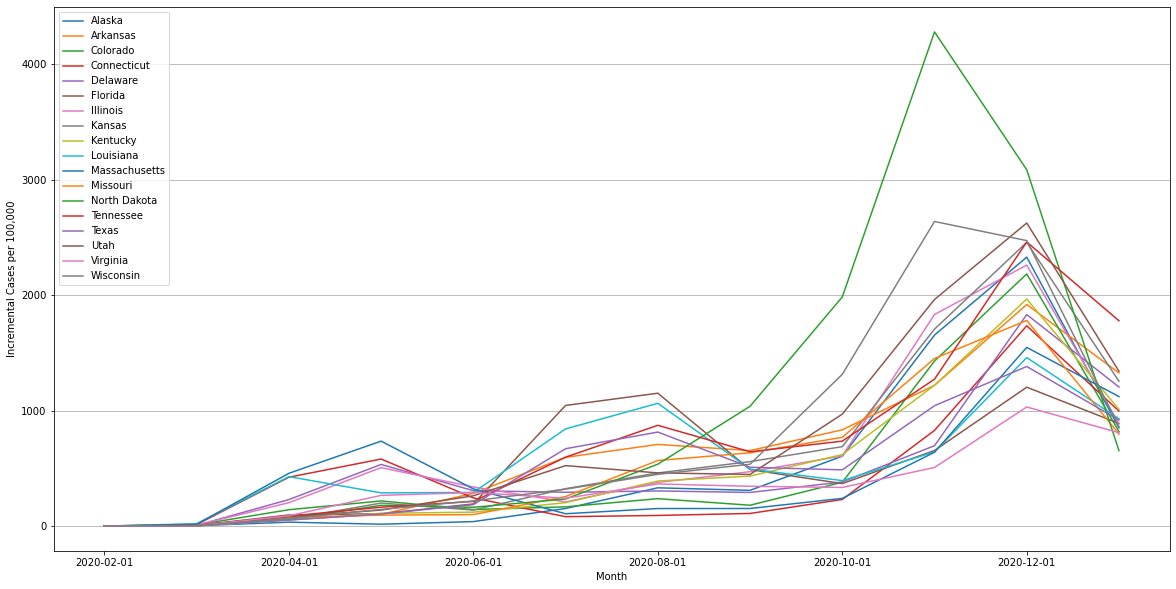

In [3]:
#Graph All
lines_inc = inc_cases_per_100000_df.plot.line(x = "Month", figsize =(20,10))
lines_inc.set_ylabel("Incremental Cases per 100,000")
lines_inc.grid('off', which='major', axis='y' )

In [4]:
# Jack Import Governor Data
gov_data = "Data/governor_political_party.csv"
gov_data_df = pd.read_csv(gov_data, encoding="ISO-8859-1") 
gov_data_df = gov_data_df.rename(columns={"ï»¿State": "State"})
gov_data_df

,State,Political Party
0,Alaska,Republican
1,Arkansas,Republican
2,Colorado,Democrat
3,Connecticut,Democrat
4,Delaware,Democrat
5,Florida,Republican
6,Illinois,Republican
7,Kansas,Democrat
8,Kentucky,Democrat
9,Louisiana,Democrat


['Colorado', 'Connecticut', 'Delaware', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Oregon', 'Virginia', 'Wisconsin']


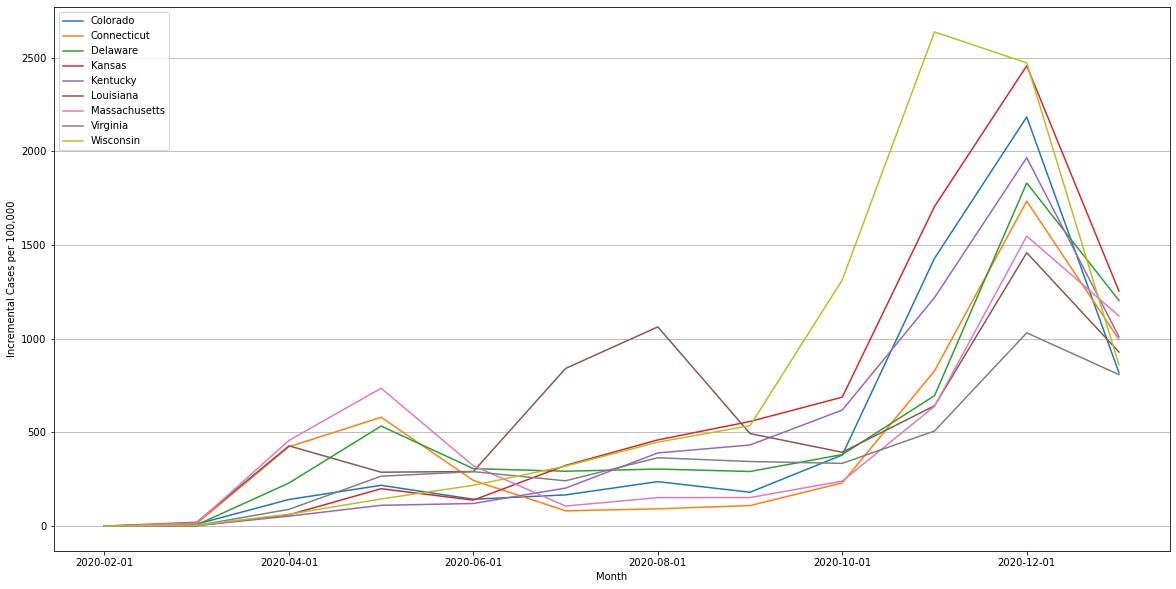

In [5]:
#Jack Graph Democratic Curves
dem_df = gov_data_df.loc[gov_data_df['Political Party'] == 'Democrat']
dem_states = dem_df['State'].tolist()
print(dem_states)


dem_data_df = inc_cases_per_100000_df[['Month', 'Colorado', 'Connecticut', 'Delaware', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Virginia', 'Wisconsin']]

dem_lines_inc = dem_data_df.plot.line(x = "Month", figsize =(20,10))
dem_lines_inc.set_ylabel("Incremental Cases per 100,000")
dem_lines_inc.grid('off', which='major', axis='y' )
plt.savefig("Democratic State COVID Cases.png")

['Alaska', 'Arkansas', 'Florida', 'Illinois', 'Missouri', 'North Dakota', 'Tennessee', 'Texas', 'Utah']


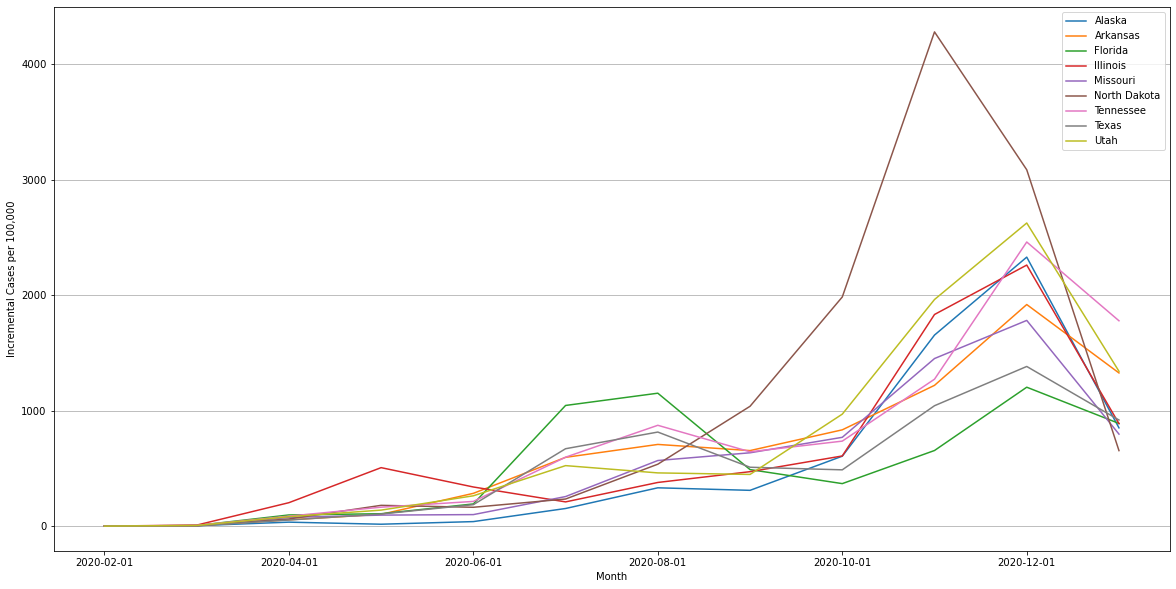

In [6]:
#Graph Republican Curves
repub_df = gov_data_df.loc[gov_data_df['Political Party'] == 'Republican']
repub_states = repub_df['State'].tolist()
print(repub_states)

repub_data_df = inc_cases_per_100000_df[['Month', 'Alaska', 'Arkansas', 'Florida', 'Illinois', 'Missouri', 'North Dakota', 'Tennessee', 'Texas', 'Utah']]

repub_lines_inc = repub_data_df.plot.line(x = "Month", figsize =(20,10))
repub_lines_inc.set_ylabel("Incremental Cases per 100,000")
repub_lines_inc.grid('off', which='major', axis='y' )
plt.savefig("Republican State COVID Cases.png")

In [95]:
#Jack Dropping last month of COVID data as it is incomplete
avgs_df = avgs_df.drop(avgs_df.index[-1])


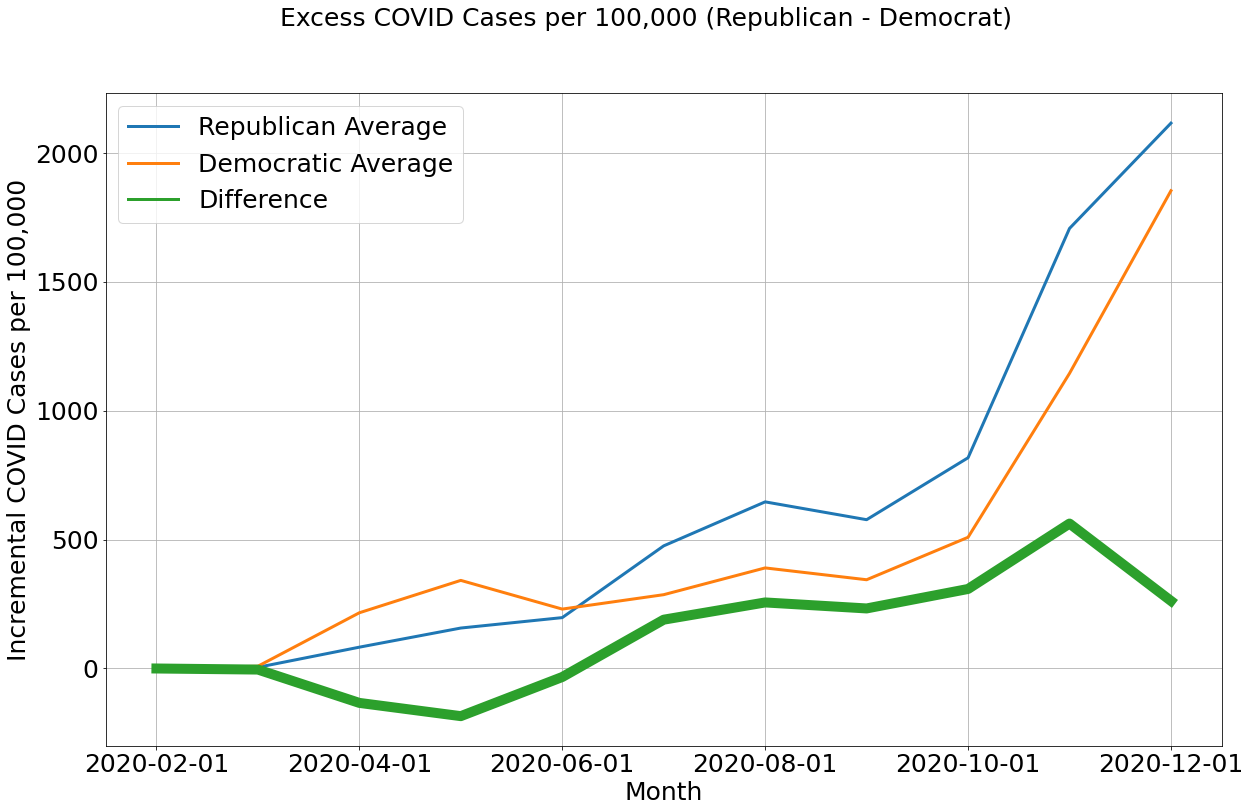

<Figure size 432x288 with 0 Axes>

In [132]:
#Jack Graph 
fig, ax = plt.subplots()
avgs_df.plot(x = "Month", figsize=(20,12),  
        lw=3, fontsize=25, ax=ax, grid=True)
plt.gcf().suptitle("Excess COVID Cases per 100,000 (Republican - Democrat)",fontsize=25)
plt.legend(loc=2, prop={'size': 25})
plt.ylabel("Incremental COVID Cases per 100,000", fontsize=25)
plt.xlabel("Month", fontsize=25)


for line in ax.get_lines():
    if line.get_label() == 'Difference':
        line.set_linewidth(10)
plt.show()

plt.savefig("Exccess COVID Cases, Republicans versus Democrats.png")

In [8]:
#Jack loan in alcohol data
file_path = "../Shadee/Data/alcsales_August2020_codedfullfile.csv"

# Read Purchasing File and store into Pandas data frame
alcohol_sales_data = pd.read_csv(file_path)
alcohol_sales_data['Month - Year (Date)'] = pd.to_datetime(alcohol_sales_data['Month - Year (Word)'])
alcohol_sales_data.head()


,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
0,2017,1,2,1,103645,42598,593378,0.0718,Alaska,January,January 2017,1 2017,2017-01-01
1,2017,1,5,1,402885,165586,2455022,0.0674,Arkansas,January,January 2017,1 2017,2017-01-01
2,2017,1,8,1,733857,301615,4634346,0.0651,Colorado,January,January 2017,1 2017,2017-01-01
3,2017,1,9,1,412100,169373,3015481,0.0562,Connecticut,January,January 2017,1 2017,2017-01-01
4,2017,1,10,1,180388,74139,799550,0.0927,Delaware,January,January 2017,1 2017,2017-01-01


Text(0, 0.5, 'Per Capita')

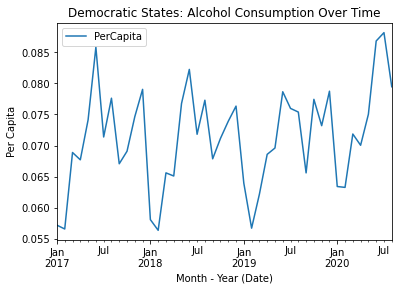

In [74]:
#Jack Dem state alcohol consumption
dem_data_consumption_df = alcohol_sales_data.loc[alcohol_sales_data["State"].isin(['Colorado', 'Connecticut', 'Delaware', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Virginia', 'Wisconsin'])]

month_date_alcohol_sales_groupby = dem_data_consumption_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_avg_pop = month_date_alcohol_sales_groupby["Population"].mean()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

dem_cleaned_month_date_alcohol_sales_groupby_df = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_avg_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

#Plot
dem_cleaned_month_date_alcohol_sales_groupby_df.plot.line( y='PerCapita', title="Democratic States: Alcohol Consumption Over Time")
plt.ylabel('Per Capita')

plt.savefig("demstates_alcohol_consumption.png")



Text(0, 0.5, 'Per Capita')

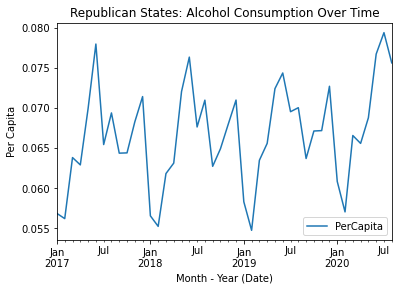

In [75]:
#Jack Repub state alcohol consumption

repub_data_consumption_df = alcohol_sales_data.loc[alcohol_sales_data["State"].isin(['Alaska', 'Arkansas', 'Florida', 'Illinois', 'Missouri', 'North Dakota', 'Tennessee', 'Texas', 'Utah'])]

month_date_alcohol_sales_groupby = repub_data_consumption_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_avg_pop = month_date_alcohol_sales_groupby["Population"].mean()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

repub_cleaned_month_date_alcohol_sales_groupby_df = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_avg_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

#Plot
repub_cleaned_month_date_alcohol_sales_groupby_df.plot.line( y='PerCapita', title="Republican States: Alcohol Consumption Over Time")
plt.ylabel('Per Capita')

plt.savefig("repubstates_alcohol_consumption.png")

Text(0, 0.5, 'Per Capita')

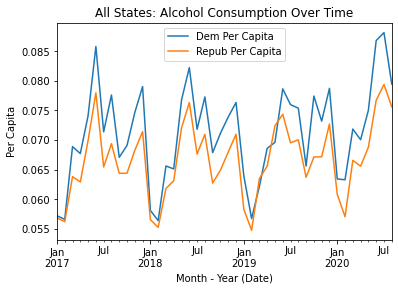

In [135]:
#Jack Republican versus Democrat alcohol consumption over time

combined_df = dem_cleaned_month_date_alcohol_sales_groupby_df

combined_df["repub per capita"] = repub_cleaned_month_date_alcohol_sales_groupby_df['PerCapita']
combined_df = combined_df.drop('Gallons', 1)
combined_df = combined_df.drop('Ethanol', 1)
combined_df = combined_df.drop('Population', 1)
combined_df = combined_df.rename(columns={'PerCapita': 'Dem Per Capita', 'repub per capita': 'Repub Per Capita'})

combined_df.plot.line(title="All States: Alcohol Consumption Over Time")
plt.ylabel('Per Capita')

In [136]:
#Jack creating difference between dem pc consumption and repub pc consumption

combined_df['Difference'] = combined_df['Dem Per Capita'] - combined_df['Repub Per Capita']
combined_df

,Dem Per Capita,Repub Per Capita,Difference
Month - Year (Date),,,
2017-01-01,0.057200,0.056838,0.000362
2017-02-01,0.056588,0.056192,0.000395
2017-03-01,0.068875,0.063804,0.005071
2017-04-01,0.067700,0.062892,0.004808
2017-05-01,0.074117,0.069915,0.004201
2017-06-01,0.085788,0.077958,0.007830
2017-07-01,0.071371,0.065427,0.005944
2017-08-01,0.077600,0.069369,0.008231
2017-09-01,0.067067,0.064354,0.002713


In [81]:
#Jack create data frame for yearly difference between republican and dem

combined_for_years_df = combined_df

data_2017 = combined_for_years_df.iloc[0:12]
difference_data_2017 = data_2017['Difference'].tolist()
difference_data_2017
combined_for_years_df = combined_for_years_df.drop(combined_df.index[[0,1,2,3,4,5,6,7,8,9,10,11]])
difference_data_2018 = combined_for_years_df['Difference'].tolist()
difference_data_2018
combined_for_years_df = combined_for_years_df.drop(combined_for_years_df.index[[0,1,2,3,4,5,6,7,8,9,10,11]])
difference_data_2019 = combined_for_years_df['Difference'].tolist()
difference_data_2019
combined_for_years_df = combined_for_years_df.drop(combined_for_years_df.index[[0,1,2,3,4,5,6,7,8,9,10,11]])
difference_data_2020 = combined_for_years_df['Difference'].tolist()
difference_data_2020
month_numbers = [1,2,3,4,5,6,7,8,9,10,11,12]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', "August", 'September', 'October', 'November', 'December']


by_year_difference_df = pd.DataFrame(list(zip(months, difference_data_2017,difference_data_2018,difference_data_2019,difference_data_2020)), 
               columns =['Month', '2017','2018','2019', '2020']) 

by_year_difference_df


,Month,2017,2018,2019,2020
0,January,0.000362,0.001553,0.005658,0.002586
1,February,0.000395,0.001148,0.001986,0.006240
2,March,0.005071,0.003796,-0.001303,0.005292
3,April,0.004808,0.001985,0.003002,0.004468
4,May,0.004201,0.004719,-0.002804,0.006252
5,June,0.007830,0.005898,0.004287,0.010084
6,July,0.005944,0.004185,0.006435,0.008752
7,August,0.008231,0.006313,0.005352,0.003829


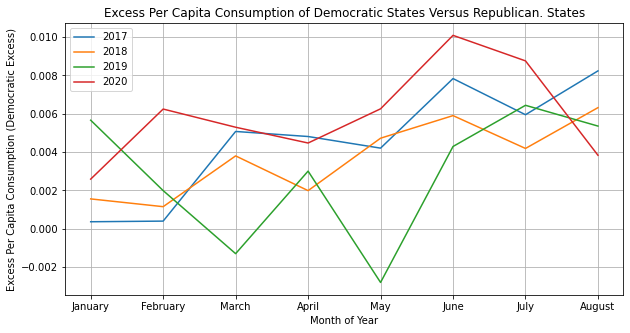

In [131]:
#Jack graph yearls excess btwn dem and repub states

by_year_difference_df.plot.line(x = 'Month',grid=True, figsize =(10,5),title="Excess Per Capita Consumption of Democratic States Versus Republican. States")
plt.ylabel('Excess Per Capita Consumption (Democratic Excess)')
plt.xlabel('Month of Year')

plt.savefig("Excess Per Capita Consumption of Democratic States Versus Republican States.png")              
                      

In [86]:
#jack create DF for all states, yearly alcohol consumption

combined_all_parties_df = cleaned_month_date_alcohol_sales_groupby_df
combined_all_parties_df = combined_all_parties_df.drop('Gallons', 1)
combined_all_parties_df = combined_all_parties_df.drop('Ethanol', 1)
combined_all_parties_df = combined_all_parties_df.drop('Population', 1)

data_2017_all = combined_all_parties_df.iloc[0:12]
difference_data_2017_all = data_2017_all['PerCapita'].tolist()
difference_data_2017_all
combined_all_parties_df = combined_all_parties_df.drop(combined_df.index[[0,1,2,3,4,5,6,7,8,9,10,11]])
difference_data_2018_all = combined_all_parties_df['PerCapita'].tolist()
difference_data_2018_all
combined_all_parties_df = combined_all_parties_df.drop(combined_all_parties_df.index[[0,1,2,3,4,5,6,7,8,9,10,11]])
difference_data_2019_all = combined_all_parties_df['PerCapita'].tolist()
difference_data_2019_all
combined_all_parties_df = combined_all_parties_df.drop(combined_all_parties_df.index[[0,1,2,3,4,5,6,7,8,9,10,11]])
difference_data_2020_all = combined_all_parties_df['PerCapita'].tolist()
difference_data_2020_all
month_numbers = [1,2,3,4,5,6,7,8,9,10,11,12]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', "August", 'September', 'October', 'November', 'December']


by_year_difference_all_df = pd.DataFrame(list(zip(months, difference_data_2017_all,difference_data_2018_all,difference_data_2019_all,difference_data_2020_all)), 
               columns =['Month', '2017','2018','2019', '2020']) 

by_year_difference_all_df


,Month,2017,2018,2019,2020
0,January,0.057390,0.057475,0.061385,0.062223
1,February,0.056627,0.056246,0.055933,0.060258
2,March,0.066356,0.063321,0.062573,0.068242
3,April,0.065969,0.064217,0.067483,0.067813
4,May,0.071760,0.074300,0.071352,0.071890
5,June,0.081704,0.079167,0.076181,0.081196
6,July,0.069156,0.070592,0.073058,0.083533
7,August,0.073642,0.074433,0.072623,0.077372


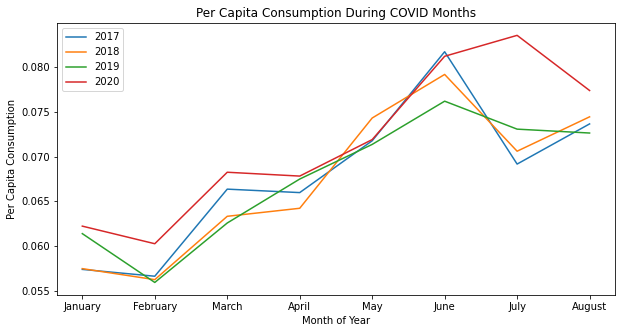

In [137]:
#jack create graph for all states, yearly consumption

by_year_difference_all_df.plot.line(x = 'Month',figsize =(10,5),title="Per Capita Consumption During COVID Months")
plt.ylabel('Per Capita Consumption')
plt.xlabel('Month of Year')
plt.savefig("All_states_alcohol_consumption_by_year.png")